In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Load Data
file_id = r'C:\Users\Omar_Atif\Desktop\jupyter python\zomato.csv'
url = file_id
df = pd.read_csv(url)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Data Cleaning
# Convert 'rate' to numeric (handle 'NEW', '-', and '/5')
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)
df['rate'] = df['rate'].apply(lambda x: float(str(x).split('/')[0]) if pd.notnull(x) else np.nan)

# Impute missing 'rate' with median
df['rate'].fillna(df['rate'].median(), inplace=True)

# Handle 'approx_cost(for two people)'
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)

# Ensure 'votes' is int
df['votes'] = df['votes'].astype(int)

# Handle categorical columns
df['location'].fillna('Unknown', inplace=True)
df['rest_type'].fillna('Unknown', inplace=True)
df['cuisines'].fillna('Unknown', inplace=True)
df['phone'].fillna('Unknown', inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify no missing values
print("Missing values after cleaning:\n", df.isnull().sum())

C:\Users\Omar_Atif\AppData\Local\Temp\ipykernel_8876\2438038941.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].median(), inplace=True)
C:\Users\Omar_Atif\AppData\Local\Temp\ipykernel_8876\2438038941.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Missing values after cleaning:
 url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                              0
location                           0
rest_type                          0
dish_liked                     28078
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


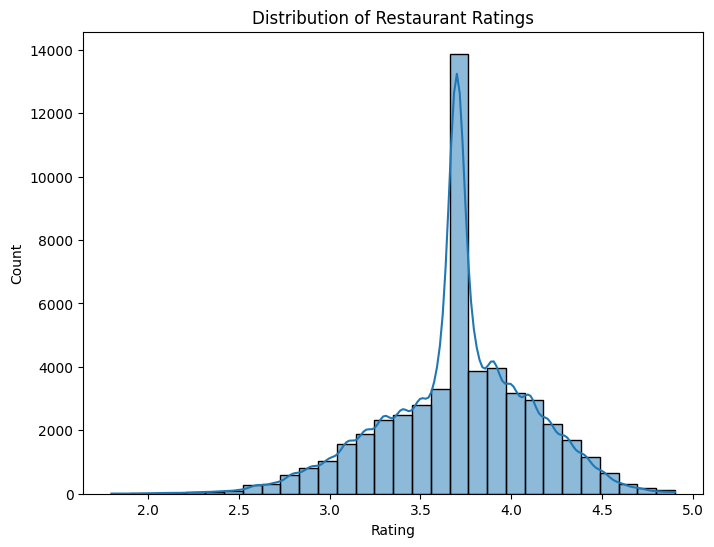

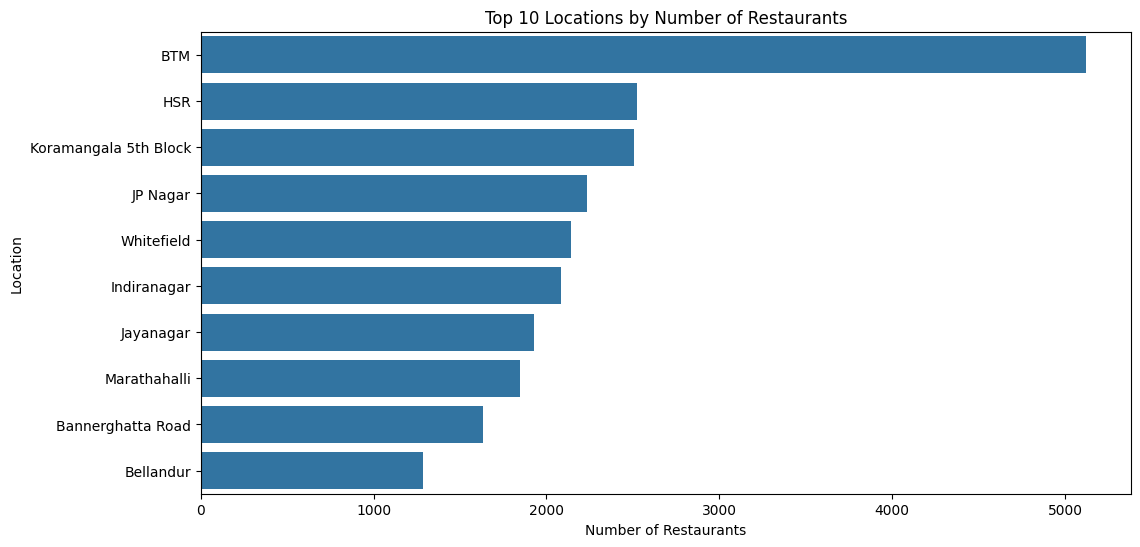

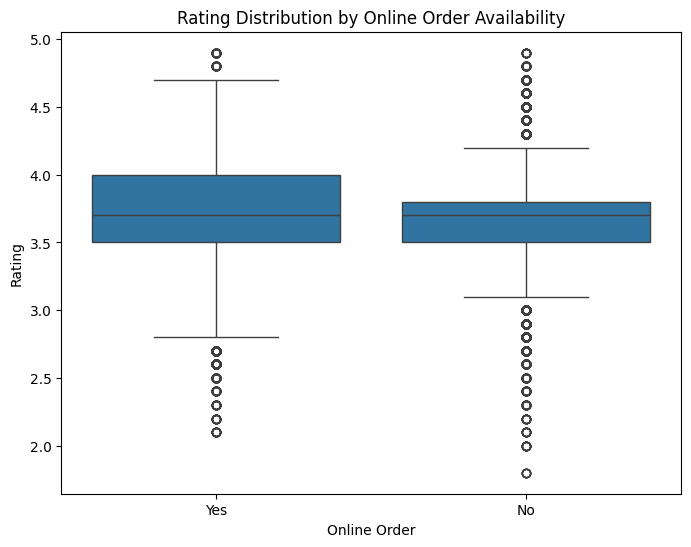

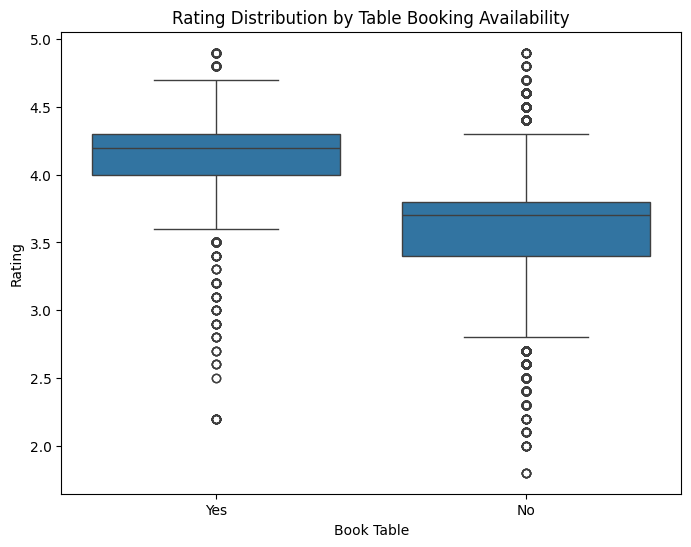

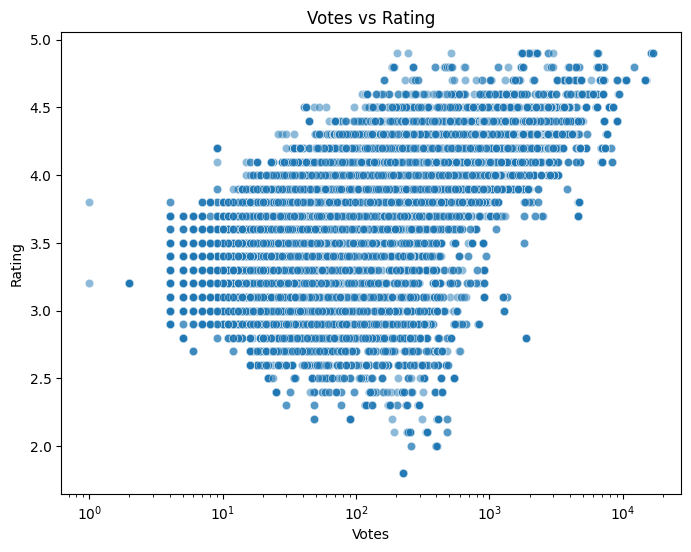

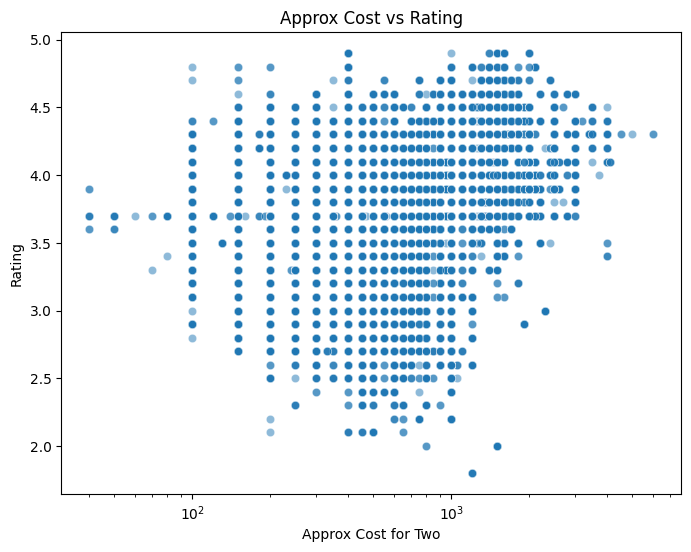

Key Insights:
1. Average rating: 3.70
2. Most common restaurant type: Quick Bites
3. Percentage offering online order: 58.87%
4. Percentage offering table booking: 12.47%


In [4]:
# EDA: Key Questions and Visualizations
# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=30, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Top Locations by Number of Restaurants
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

# 3. Online Order vs Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating Distribution by Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()

# 4. Book Table vs Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Rating Distribution by Table Booking Availability')
plt.xlabel('Book Table')
plt.ylabel('Rating')
plt.show()

# 5. Votes vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.5)
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

# 6. Approx Cost vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5)
plt.title('Approx Cost vs Rating')
plt.xlabel('Approx Cost for Two')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

# Key Questions from Dataset Description
print("Key Insights:")
print(f"1. Average rating: {df['rate'].mean():.2f}")
print(f"2. Most common restaurant type: {df['rest_type'].mode()[0]}")
print(f"3. Percentage offering online order: {(df['online_order'] == 'Yes').mean() * 100:.2f}%")
print(f"4. Percentage offering table booking: {(df['book_table'] == 'Yes').mean() * 100:.2f}%")

In [5]:
# Preprocessing and Binning for Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Bin 'rate' into classes: Low (0: <3.5), Medium (1: 3.5-4.0), High (2: >4.0)
bins = [0, 3.5, 4.0, 5.0]
labels = [0, 1, 2]  # 0: Low, 1: Medium, 2: High
df['rate_class'] = pd.cut(df['rate'], bins=bins, labels=labels, include_lowest=True)

# Features and target
features = ['online_order', 'book_table', 'votes', 'approx_cost(for two people)', 'listed_in(type)']
target = 'rate_class'

df_model = df[features + [target]].dropna()  # Ensure no NaNs

X = df_model[features]
y = df_model[target].astype(int)  # Convert to int for classification

# Preprocessing pipelines
numeric_features = ['votes', 'approx_cost(for two people)']
categorical_features = ['online_order', 'book_table', 'listed_in(type)']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

# Check for NaNs in processed data
print("NaN in X_train_pre:", np.isnan(X_train_pre).sum())
print("NaN in X_test_pre:", np.isnan(X_test_pre).sum())
print("NaN in y_train:", np.isnan(y_train).sum())
print("NaN in y_test:", np.isnan(y_test).sum())

print("Preprocessing completed. X_train shape:", X_train_pre.shape)

NaN in X_train_pre: 0
NaN in X_test_pre: 0
NaN in y_train: 0
NaN in y_test: 0
Preprocessing completed. X_train shape: (41373, 13)


In [6]:
# Apply ML Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dictionary to store model accuracies
model_accuracies = {}

# 1. Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr.fit(X_train_pre, y_train)
y_pred_lr = lr.predict(X_test_pre)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = lr_accuracy
print("Logistic Regression Evaluation:")
print("Accuracy:", lr_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=['Low', 'Medium', 'High']))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pre, y_train)
y_pred_rf = rf.predict(X_test_pre)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = rf_accuracy
print("\nRandom Forest Evaluation:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Low', 'Medium', 'High']))

# 3. SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pre, y_train)
y_pred_svm = svm.predict(X_test_pre)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_accuracies['SVM'] = svm_accuracy
print("\nSVM Evaluation:")
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=['Low', 'Medium', 'High']))

# Select best ML model
best_ml_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest ML Model: {best_ml_model} with accuracy {model_accuracies[best_ml_model]:.4f}")

# Save best ML model (Random Forest if it's the best)
best_ml_model_obj = rf if best_ml_model == 'Random Forest' else (lr if best_ml_model == 'Logistic Regression' else svm)

print("ML Classification models applied successfully.")

C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Evaluation:
Accuracy: 0.6183294663573086
Confusion Matrix:
 [[   0 2767   12]
 [   0 5412  308]
 [   0  861  984]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00      2779
      Medium       0.60      0.95      0.73      5720
        High       0.75      0.53      0.62      1845

    accuracy                           0.62     10344
   macro avg       0.45      0.49      0.45     10344
weighted avg       0.47      0.62      0.52     10344



C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap


Random Forest Evaluation:
Accuracy: 0.8321732405259087
Confusion Matrix:
 [[2142  590   47]
 [ 559 4933  228]
 [  56  256 1533]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.78      0.77      0.77      2779
      Medium       0.85      0.86      0.86      5720
        High       0.85      0.83      0.84      1845

    accuracy                           0.83     10344
   macro avg       0.83      0.82      0.82     10344
weighted avg       0.83      0.83      0.83     10344


SVM Evaluation:
Accuracy: 0.6170726991492653
Confusion Matrix:
 [[   0 2761   18]
 [   0 5318  402]
 [   0  780 1065]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00      2779
      Medium       0.60      0.93      0.73      5720
        High       0.72      0.58      0.64      1845

    accuracy                           0.62     10344
   macro avg       0.44      0.50      0.46     1

C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.pr

Epoch 1/50


C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6136 - loss: 0.7847 - val_accuracy: 0.6202 - val_loss: 0.7478
Epoch 2/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6225 - loss: 0.7502 - val_accuracy: 0.6244 - val_loss: 0.7386
Epoch 3/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6248 - loss: 0.7435 - val_accuracy: 0.6244 - val_loss: 0.7414
Epoch 4/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6255 - loss: 0.7401 - val_accuracy: 0.6256 - val_loss: 0.7342
Epoch 5/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6257 - loss: 0.7385 - val_accuracy: 0.6274 - val_loss: 0.7315
Epoch 6/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6246 - loss: 0.7350 - val_accuracy: 0.6237 - val_loss: 0.7363
Epoch 7/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6264 - loss: 0.7332 - val_accuracy: 0.6285 - val_loss: 0.7273
Epoch 8/50
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6279 - loss: 0.7294 - val_accurac

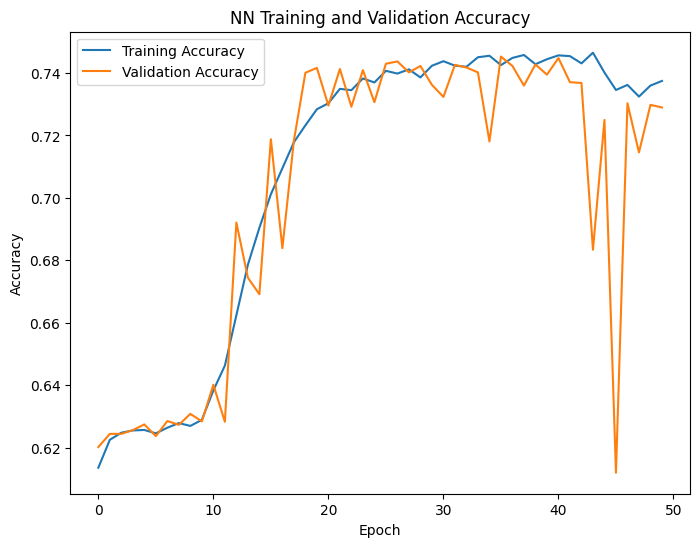


Model Comparison:
Logistic Regression: 0.6183
Random Forest: 0.8322
SVM: 0.6171
Neural Network: 0.7307
NN model applied successfully with good metrics.


In [7]:
# Install TensorFlow (run once if not installed)
!pip install tensorflow

# Apply Neural Network (NN) for Classification
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build NN model for classification
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_pre.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))  # 3 classes: Low, Medium, High

# Compile
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = nn_model.fit(X_train_pre, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predictions and Evaluation
y_pred_nn = nn_model.predict(X_test_pre).argmax(axis=1)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
model_accuracies['Neural Network'] = nn_accuracy
print("\nNeural Network Evaluation:")
print("Accuracy:", nn_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn, target_names=['Low', 'Medium', 'High']))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('NN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compare all models
print("\nModel Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

print("NN model applied successfully with good metrics.")

In [8]:
# Create Sampled Dataset for Streamlit Deployment
# Sample 2% of the data to reduce size
df_sample = df.sample(frac=0.02, random_state=42)
df_sample.to_csv('zomato_sample.csv', index=False)
print("Sampled dataset created: zomato_sample.csv")

# Save Models and Preprocessor for Streamlit
import joblib

# Save best ML model and preprocessor
joblib.dump(best_ml_model_obj, 'best_ml_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Save NN model
nn_model.save('nn_model.h5')

print("Models and preprocessor saved for Streamlit.")

Sampled dataset created: zomato_sample.csv
Models and preprocessor saved for Streamlit.
